In [10]:
!pip install seaborn
!pip install nltk
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install IPython
!pip install math
!pip install pprint
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import csv
import os

In [11]:
df = pd.read_csv("news.csv")

In [13]:
df

,Title,URL
0,Delhi Results: The Math Behind Arvind Kejriwal...,https://news.google.com/articles/CBMiZGh0dHBzO...
1,Why India's Muslims Are in Grave Danger,https://news.google.com/articles/CAIiEEA6jF0-6...
2,India’s riot toll rises to 46 as capital remai...,https://news.google.com/articles/CAIiEO_szpYja...
3,India Failing To Make Progress In Its Campaign...,https://news.google.com/articles/CAIiEHI1QdksX...
4,"In Indian Wells election, voters to decide ter...",https://news.google.com/articles/CAIiELzyp3NAm...
...,...,...
95,India election 2019: Can West Bengal's female ...,https://news.google.com/articles/CAIiEFFx0yoFH...
96,India is voting: who is going to win the world...,https://news.google.com/articles/CBMinQFodHRwc...
97,Assembly Elections 2019: Haryana records voter...,https://news.google.com/articles/CBMiMmh0dHBzO...
98,India election 2019: How many new airports hav...,https://news.google.com/articles/CAIiEHhvVCchS...


In [21]:
titles =  df['Title'].tolist()

In [23]:
print(type(titles))
titles

<class 'list'>


['Delhi Results: The Math Behind Arvind Kejriwal’s Second Sweep',
 "Why India's Muslims Are in Grave Danger",
 'India’s riot toll rises to 46 as capital remains on edge',
 'India Failing To Make Progress In Its Campaign Against Corruption',
 'In Indian Wells election, voters to decide term limits, mayor rotation',
 'How did British Indians become so prominent in the Conservative party?',
 'Delhi election 2020: Voting date, constituency-wise details, exit poll, results, all you need to know',
 'India election results 2019: Modi claims landslide victory',
 'Swedish MPs visit ECI, meet Election Commissioners Arora, Lavasa, Chandra',
 "India Election 2019: A Simple Guide to the World's Largest Vote",
 'India election 2019: Sixth round of voting for 59 seats completed',
 'Will these bad times never end?',
 "Poll affidavit case: SC dismisses Fadnavis' plea seeking review of 2019 verdict",
 'India concludes marathon seven-phase election, results on May 23',
 'India elections 2019: All the lat

#### NLTK’s built-in Vader Sentiment Analyzer will simply rank a piece of text as positive, negative or neutral using a lexicon of positive and negative words.

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.downloader.download('vader_lexicon')
sia = SIA()
results = []

for headline in titles:
    pol_score = sia.polarity_scores(headline)
#     print(pol_score)
    pol_score['headline'] = headline
    results.append(pol_score)
pprint(results[:2], width=70)

[{'compound': 0.0,
  'headline': 'Delhi Results: The Math Behind Arvind Kejriwal’s '
              'Second Sweep',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.7184,
  'headline': "Why India's Muslims Are in Grave Danger",
  'neg': 0.545,
  'neu': 0.455,
  'pos': 0.0}]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sahil/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Generating labels for each headline.

In [38]:
sentiments = pd.DataFrame.from_records(results)

In [41]:
sentiments.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Delhi Results: The Math Behind Arvind Kejriwal...
1,0.545,0.455,0.000,-0.7184,Why India's Muslims Are in Grave Danger
2,0.265,0.735,0.000,-0.5574,India’s riot toll rises to 46 as capital remai...
3,0.234,0.567,0.199,-0.1280,India Failing To Make Progress In Its Campaign...
4,0.000,0.833,0.167,0.2500,"In Indian Wells election, voters to decide ter..."


In [43]:
sentiments['label'] = 0
sentiments.loc[sentiments['compound'] > 0.2, 'label'] = 1
sentiments.loc[sentiments['compound'] < -0.2, 'label'] = -1
sentiments.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Delhi Results: The Math Behind Arvind Kejriwal...,0
1,0.545,0.455,0.000,-0.7184,Why India's Muslims Are in Grave Danger,-1
2,0.265,0.735,0.000,-0.5574,India’s riot toll rises to 46 as capital remai...,-1
3,0.234,0.567,0.199,-0.1280,India Failing To Make Progress In Its Campaign...,0
4,0.000,0.833,0.167,0.2500,"In Indian Wells election, voters to decide ter...",1


In [44]:
df2 = sentiments[['headline', 'label']]
df2.to_csv('new_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [45]:
df2

,headline,label
0,Delhi Results: The Math Behind Arvind Kejriwal...,0
1,Why India's Muslims Are in Grave Danger,-1
2,India’s riot toll rises to 46 as capital remai...,-1
3,India Failing To Make Progress In Its Campaign...,0
4,"In Indian Wells election, voters to decide ter...",1
...,...,...
95,India election 2019: Can West Bengal's female ...,1
96,India is voting: who is going to win the world...,1
97,Assembly Elections 2019: Haryana records voter...,0
98,India election 2019: How many new airports hav...,0


In [47]:
print("Positive headlines:\n")
pprint(list(df2[df2['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df2[df2['label'] == -1].headline)[:5], width=200)

Positive headlines:

['In Indian Wells election, voters to decide term limits, mayor rotation',
 'How did British Indians become so prominent in the Conservative party?',
 'India elections 2019: The taming of the great Indian election',
 "India Gets Ready for High-Stakes Elections in the World's Biggest Democracy",
 'For India’s Youth, These Elections Are About More Than Party Politics']

Negative headlines:

["Why India's Muslims Are in Grave Danger",
 'India’s riot toll rises to 46 as capital remains on edge',
 'Will these bad times never end?',
 'BJP loses fifth state election as India rocked by citizenship protests',
 'India’s BJP Loses Another State Poll, Adding To Modi’s Woes']


In [48]:
print(df2.label.value_counts())

print(df2.label.value_counts(normalize=True) * 100)

 0    74
-1    16
 1    10
Name: label, dtype: int64
 0    74.0
-1    16.0
 1    10.0
Name: label, dtype: float64


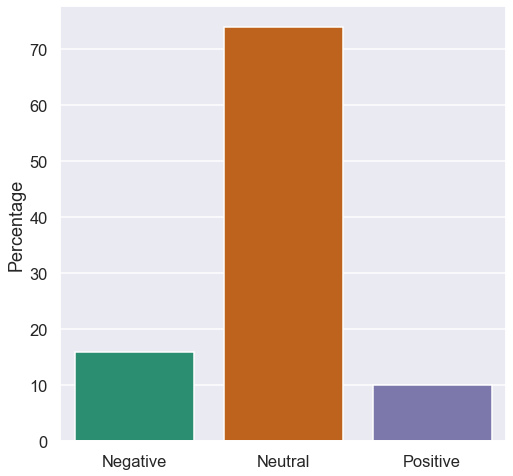

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df2.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

## Tokenizers and Stopwords 

In [51]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.downloader.download('punkt')

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))


[nltk_data] Downloading package punkt to /Users/sahil/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [52]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [54]:
from nltk.corpus import stopwords
nltk.downloader.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to /Users/sahil/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Word Distributions 

In [55]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens


In [62]:
# tokens = process_text(titles)

In [64]:
pos_lines = list(df2[df2.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('india', 8),
 ('election', 6),
 ('2019', 6),
 ('indian', 3),
 ('elections', 3),
 ('party', 2),
 ('world', 2),
 ('biggest', 2),
 ('win', 2),
 ('wells', 1),
 ('voters', 1),
 ('decide', 1),
 ('term', 1),
 ('limits', 1),
 ('mayor', 1),
 ('rotation', 1),
 ('british', 1),
 ('indians', 1),
 ('become', 1),
 ('prominent', 1)]

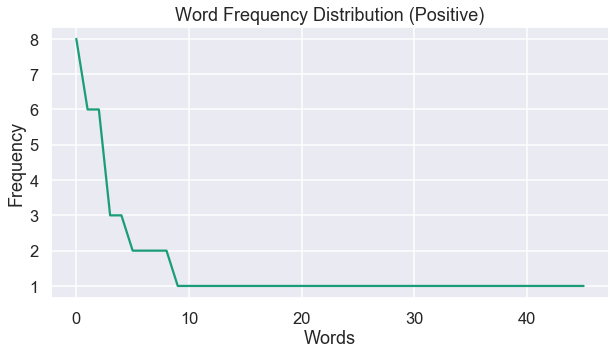

In [65]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

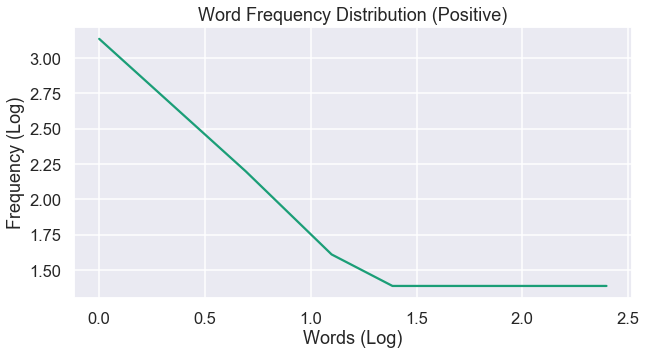

In [66]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [67]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('india', 11),
 ('election', 7),
 ('2019', 6),
 ('loses', 4),
 ('bjp', 3),
 ('state', 3),
 ('modi', 3),
 ('poll', 2),
 ('elections', 2),
 ('narendra', 2),
 ('muslims', 1),
 ('grave', 1),
 ('danger', 1),
 ('riot', 1),
 ('toll', 1),
 ('rises', 1),
 ('46', 1),
 ('capital', 1),
 ('remains', 1),
 ('edge', 1)]

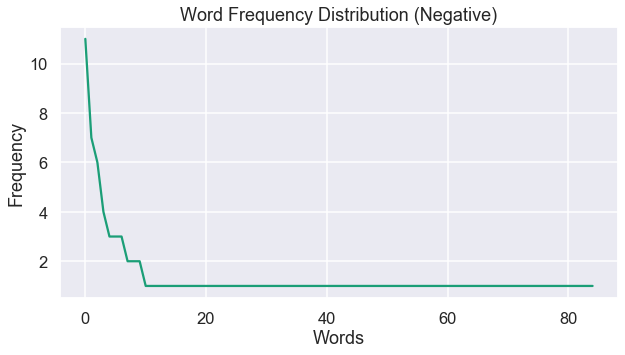

In [68]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

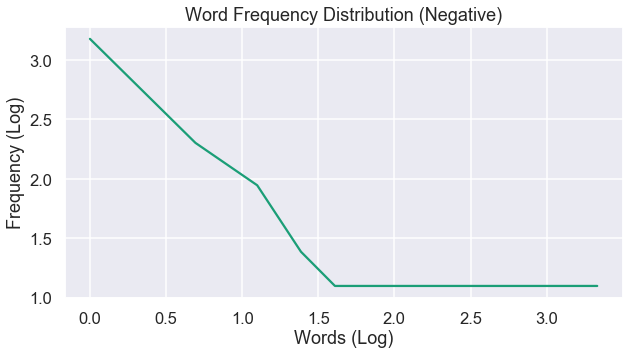

In [69]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()